# Interpolation | Extrapolation

* Lagrange Interpolation, using Lagrange Polynomials

* Richardson Extrapolation

In [4]:
# Basic Imports
import numpy as np,\
       scipy as sc,\
       matplotlib.pyplot as plt

## Lagrange Interpolation

Lagrange Interpolation Polynomial, $L(x)$ is given as the following linear combination...

$$\boxed{L(x) = \sum_{i = 0}^k y_il_i(x)}$$

...of the Lagrange Basis Polynomials, $l(x)$:

$$\boxed{l_i(x) = \prod_{0 \le m \lt k\\m \ne j}\frac{x - x_m}{x_i - x_m}}$$

Here, $x_i \ne x_j, i, j \in [k], k \in \mathbb{N}$, for all X-Coordinates of the points, to be interpolated (`x_coor`).

### INPUTS:

* `x_coor`: X-Coordinates of points, to be interpolated | **ALL DISTINCT**
* `y_coor`: Y-Coordinates of points, to be interpolated
* `step`: Step-size for meshing the interpolation

### OUTPUTS:

* `x_mesh`: Mesh, used for Interpolation (based on `step`)
* `L`: Lagrange Interpolation Polynomial Function (Here, as an array of interpolated functional values)

### Notes:

* Used for Polynomial Interpolation AKA generating (usually, lowest-degree) Polynomial Representation for functions (over the interval, specified by `x_coor`).

* Can be used to derive Newton-Cotes Formulae of Numerical Integration.

* Interpolates the function exactly (i.e. with 0 error at interpolating points - at corners, however, *Runge's Phenomenon* may be observed).

* Gives the polynomial function of lowest degree, that is satisfied at all interpolating points.

* Susceptible to *Runge's Phenomenon* of Large Oscillation.

* It is easier to use *Newton's Polynomials*, than $l(x)$.

* In *Barycentric Form*, $l(x)$ is not needed to be calculated for each evaluation of $L(x)$.

* Polynomial Interpolation problem is solvable with a unique solution: *Unisolvence Theorem*. (Proof uses Vandermonde Matrix)

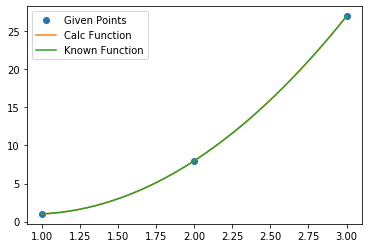

In [5]:
def l_basis(x_mesh, x_coor, i):
    """
    INPUT:
    x_mesh: Numpy array | Contains all mesh-points
    x_coor: Numpy array | Contains all x-coordinates | ALL DISTINCT
    i: Index of Lagrange Basis Polynomial
    OUTPUT:
    li : Numpy array | Contains values corresponding to the ith Lagrange Basis Polynomial
    """
    # Initiializing li with 1s
    li = np.ones_like(x_mesh)
    for j in range(x_coor.size):
        if j != i:
            li *= (x_mesh - x_coor[j])/(x_coor[i] - x_coor[j])
    
    return li

def lagrange_interpolate(x_coor, y_coor, step=1e-3):
    """
    INPUT:
    x_coor: Numpy array | Contains all x-coordinates | ALL DISTINCT
    y_coor: Numpy array | Contains all y-coordinates
    step: Step-size for Meshing & Interpolation
    OUTPUT:
    L : Numpy array | Contains values corresponding to the Lagrange Interpolated Polynomial
    """
    N = np.ceil((x_coor[-1] - x_coor[0])/step) # Number of Slices
    x_mesh = np.linspace(x_coor[0], x_coor[-1], N, dtype=float)
    # Initiializing L with 0s
    L = np.zeros_like(x_mesh)
    
    for i in range(x_coor.size):
        L += y_coor[i]*l_basis(x_mesh, x_coor, i)
    
    return x_mesh, L


# Module Test
x_coor = np.array([1,3,5,10,21])
# y_coor = np.cos(x_coor)
y_coor = np.array([2,3,5,8,10]) # Random y-coordinates

mesh, L = lagrange_interpolate(x_coor, y_coor, step=1e-3)

# plt.plot(x_coor, y_coor, "o")
# plt.plot(mesh, L)

# EXAMPLE, WITH KNOWN L:
x = np.array([1,2,3])
y = np.array([1,8,27])

m, l = lagrange_interpolate(x, y)
L = (lambda x: 6*x**2 - 11*x + 6)(m)

plt.plot(x, y, "o", label="Given Points")
plt.plot(m, l, label="Calc Function")
plt.plot(m, L, label="Known Function")
plt.legend()

## Richardson Extrapolation

For an exact value, $A^*$, and $A(h)$, being its approximation:

$$A^* = A(h) + a_0h^{k_0} + a_1h^{k_1} + \dots$$

with unknown $a_i$ and known $k_i$, such that, $h^{k_i} \gt h^{k_{i+1}}$. Usually, $k_i \in {N} \implies k_i = [i], i \in \mathbb{N}$. Then, we have the following general recurrence relation for the approximations, as follows:

$$\boxed{A_{i+1}(h) = \frac{t^{k_i}A_i\left(\frac{h}{t}\right) - A_i(h)}{t^{k_i} - 1}}$$

where $k_{i+1}$ satisfies:

$$\boxed{A^* = A_{i+1}(h) + \mathcal{O}(h^{k_{i+1}})}$$

* Each Richardson iteration/recurrence increases the order (error/step-size) by 1, thereby reducing the error. Note that, the formula above goes as $\mathcal{O}(h^{k_{i+1}})$, as opposed to $\mathcal{O}(h^{k_i})$.

* $k_0$ (representing first-order behaviour/error term), for common integration methods is given below:
    * Basic Euler | Linear : $k_0 = 1$
    * Improved Euler | Trapezoidal: $k_0 = 2$
    * RK4: $k_0 = 4$
    
* $t =$ the factor, by which the step-size/error ($h$) is being modified. For example,
    * On halving step-size, $t = 2$.
    * Taking $1/4$-th of $h$, $t = 4$.
    * And, so on...
    
### Specific Example, with Trapezoidal Rule

* $t = 2$ and $k_0 = 2$

* Formula:

$$\boxed{A^* = \frac{2^{k_i}A_i\left(\frac{h}{2}\right) - A_i(h)}{2^{k_i} - 1}}$$

### Notes:

* Linear Sequence Transformation for Series Accelaration, i.e to increase the Rate of Convergence of the Integration Method.

* Romberg Integration applies this repeatedly to the Trapezoidal Rule.

In [6]:
# Adapted from Trapezoidal Rule Code in Integration.ipynb
# Note the change in parameter order
def trap_int(func, n0, n1, step=1e-3):
    """
    INPUT:
    n0: Lower Limit
    n1: Upper Limit
    func: Function, to be integrated
    step: Step-size
    OUTPUT:
    I: Integral Value
    """
    N = np.ceil((n1-n0)/step) # Number of Slices
    x = np.linspace(n0, n1, N, dtype=float)
    f = np.array(func(x), dtype=float) # Array to store functional values
        
    # To store the integral value
    I = ((f[0] + f[-1])/2 + np.sum(f[1:-1]))*step

    return I

# Generator of Extrapolation, till order = order_of_extrap | Similar to ROMBERG
def rich_extrap(func, args, t, k0, h, order_of_extrap=5):
    """
    func: Method of Integration
    args: Tuple | Contains arguments to "func"
    t: Factor for modifying Step-size, "h"
    k0: First Order Behaviour of "func"
    h: Initial Step-size
    order_of_extrap: Order, up to which, Richardson Extrapolation is to work
    """
    h, order = h, 1
    while order <= order_of_extrap:
        yield order, h, ((t**k0)*func(*args, h/t) - func(*args, h))/(t**k0 - 1)
        h /= t
        order += 1

### MODULE TEST FOR RICHARDSON EXTRAPOLATION

In [9]:
# Function, to be integrated, with limits
f = lambda x: np.cos(x)
n0 = 0
n1 = 2
dt = 2 # h

# Trapezoidal Rule
t = 2
k0 = 2
func = trap_int
args = (f, n0, n1)

# Number of orders to extrapolate to
ord_rich_ext = 8

# To check the order (error) for using the Integration Method directly, without any extrapolation
h_for_direct_func = 2/np.array([2**i for i in range(ord_rich_ext)])

# True value of Integral (barring any round-off/machine errors)
true_val = np.sin(n1) - np.sin(0)

print("TESTING DIRECT TRAPEZOIDAL INTEGRATION\n\nORDER | h (dt) | INTEGREAL, I | Error (%)\n")
for index, h in enumerate(h_for_direct_func):
    calc_val = func(f, n0, n1, h)
    err = 100*(true_val - calc_val)/true_val
    print(index+1, h, calc_val, err, end="\n", sep=" | ")

print("\nTESTING RICHARDSON EXTRAPOLATION (TRAPEZOIDAL INTEGRATION)\n\nORDER | h (dt) | INTEGREAL, I | Error (%)\n")
for i, h, extrapolated in rich_extrap(func, args, t, k0, dt, ord_rich_ext):
    err = 100*(true_val - extrapolated)/true_val
    print(i, h, extrapolated, err, sep=" | ")
    
print("\n\nCOMPARING WITH scipy.integrate.romberg\n")
from scipy.integrate import romberg

scipy_val = romberg(f, n0, n1, show=1)

TESTING DIRECT TRAPEZOIDAL INTEGRATION

ORDER | h (dt) | INTEGREAL, I | Error (%)

1 | 2.0 | 2.0 | -119.95003405892328
2 | 1.0 | 0.2919265817264288 | 67.89536920328347
3 | 0.5 | 0.6565257079031832 | 27.798574093068066
4 | 0.25 | 0.7902153855221971 | 13.09604952025378
5 | 0.125 | 0.8512030502013308 | 6.38893005857895
6 | 0.0625 | 0.880576317548863 | 3.1586044818231653
7 | 0.03125 | 0.8950144798704428 | 1.5707673346332962
8 | 0.015625 | 0.9021748952310733 | 0.783300533409938

TESTING RICHARDSON EXTRAPOLATION (TRAPEZOIDAL INTEGRATION)

ORDER | h (dt) | INTEGREAL, I | Error (%)

1 | 2 | -0.2774312243647616 | 130.51050362401907
2 | 1.0 | 0.7780587499621013 | 14.432975722996266
3 | 0.5 | 0.8347786113952017 | 8.195207995982347
4 | 0.25 | 0.871532271761042 | 4.153223571354014
5 | 0.125 | 0.890367406664707 | 2.0818292895712416
6 | 0.0625 | 0.8998272006443028 | 1.0414882855700023
7 | 0.03125 | 0.9045617003512835 | 0.5208115996688186
8 | 0.015625 | 0.9069294891690319 | 0.2604139841147627


COMPAR